In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
data = pd.read_csv('mountains_vs_beaches_preferences.csv')
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


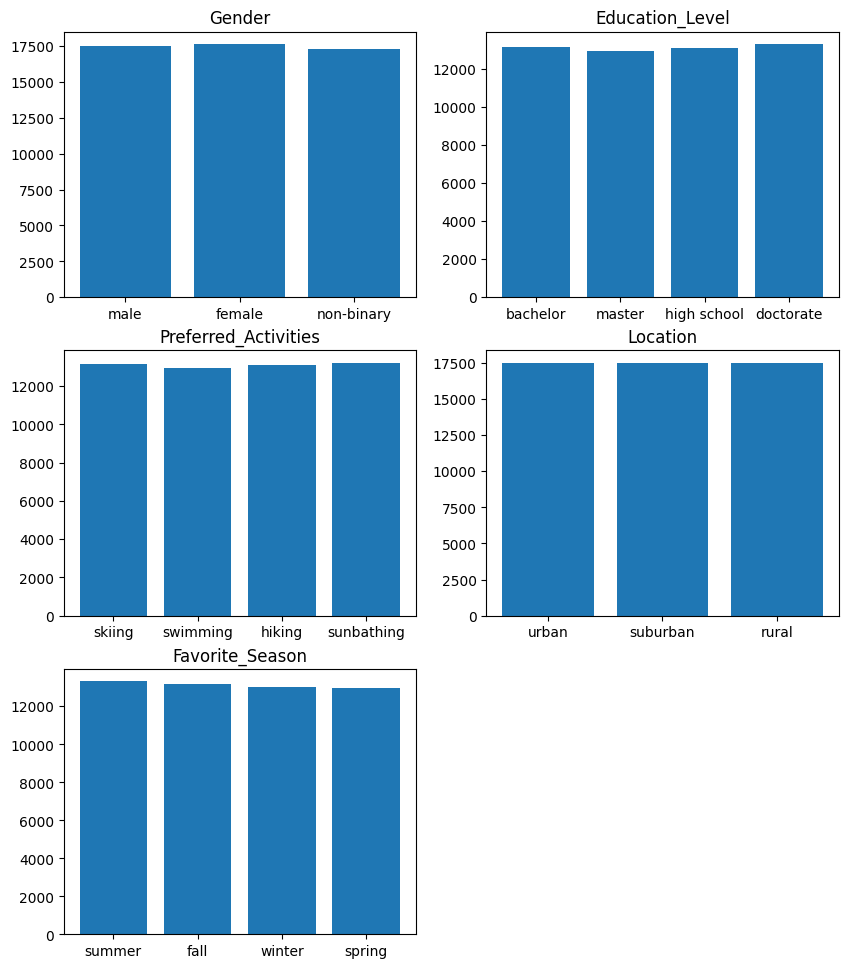

In [71]:
categorical_cols = ['Gender', 'Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season']

plt.figure(figsize=(len(categorical_cols)*2,20))
i = 0
for col in categorical_cols:
    i += 1
    labels = data[col].unique()
    values = [len(data[data[col]==label]) for label in labels]
    plt.subplot(len(categorical_cols), 2, i)
    plt.title(col)
    plt.bar(labels,values)

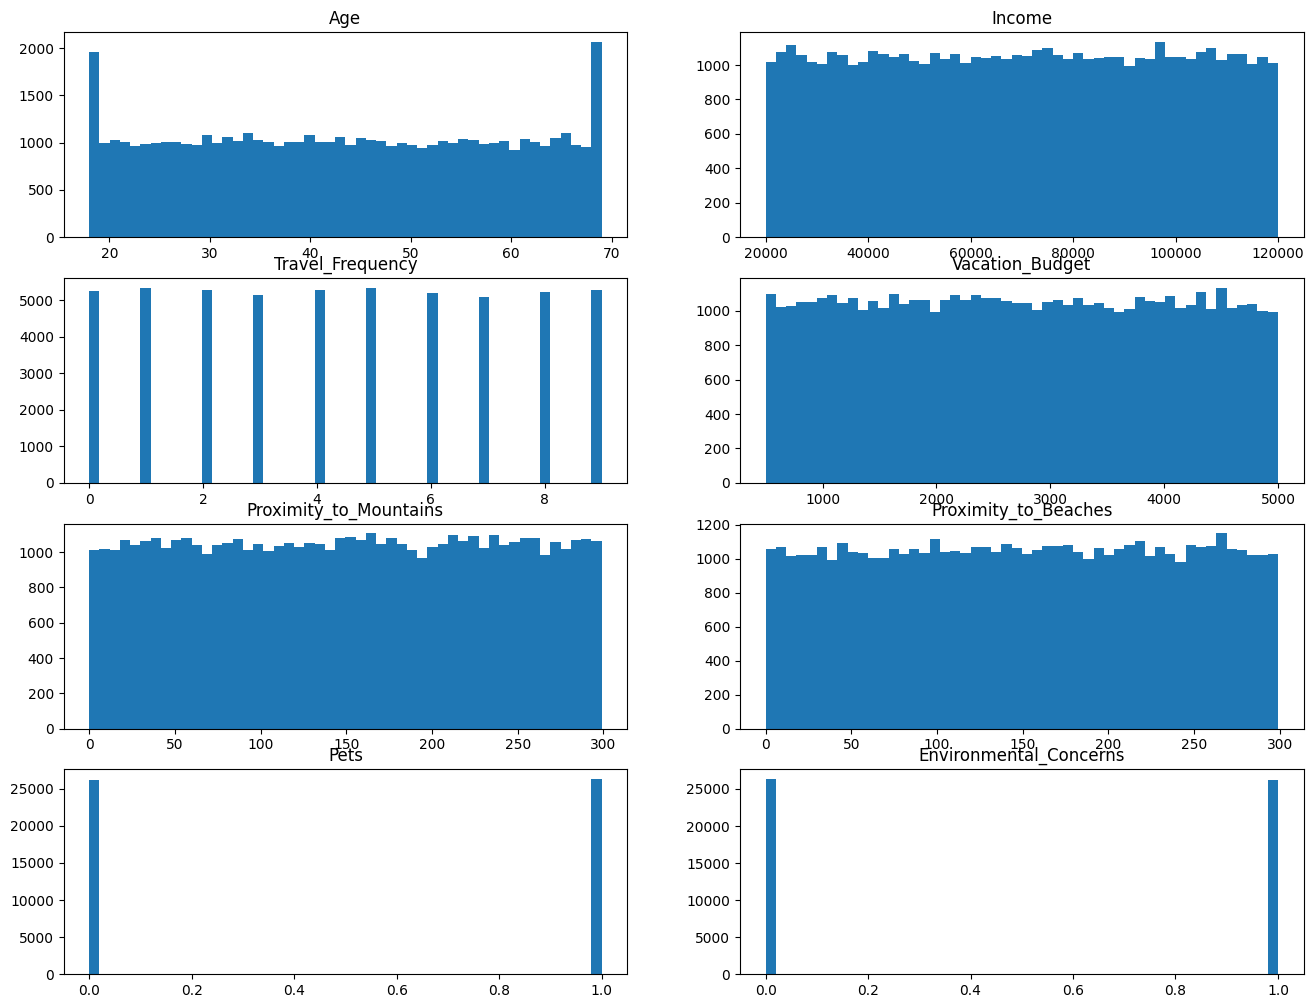

In [72]:
numerical_cols = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Environmental_Concerns']
plt.figure(figsize=(len(numerical_cols)*2,25))
i = 0
for col in numerical_cols:
    i += 1
    plt.subplot(len(numerical_cols), 2, i)
    plt.title(col)
    plt.hist(data[col], 50)

In [73]:
for col in categorical_cols:
    dict = {}
    i = 0
    for val in data[col].unique():
        dict[val] = i
        i += 1
    data[col] = data[col].map(dict)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,0,71477,0,9,0,2477,0,175,267,0,0,1,1
1,69,0,88740,1,1,1,4777,1,228,190,1,0,1,0
2,46,1,46562,1,0,0,1469,0,71,280,2,0,0,1
3,32,2,99044,2,6,2,1482,2,31,255,0,1,0,1
4,60,1,106583,2,5,3,516,1,23,151,2,1,1,0


In [74]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [102]:
model = Sequential([
    Dense(13, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=100, verbose=1)

Epoch 1/100


492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7719 - loss: 0.4559 - val_accuracy: 0.8590 - val_loss: 0.2658
Epoch 2/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9021 - loss: 0.2010 - val_accuracy: 0.9761 - val_loss: 0.0663
Epoch 3/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9806 - loss: 0.0511 - val_accuracy: 0.9879 - val_loss: 0.0270
Epoch 4/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9843 - loss: 0.0385 - val_accuracy: 0.9929 - val_loss: 0.0181
Epoch 5/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9897 - loss: 0.0256 - val_accuracy: 0.9900 - val_loss: 0.0235
Epoch 6/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9889 - loss: 0.0274 - val_accuracy: 0.9938 - val_loss: 0.0137
Epoch 7/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9915 - loss: 0.0210 - val_accuracy: 0.9895 - val_loss: 0.0219
Epoch 8/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.9895 - loss: 0.0240 - val_ac

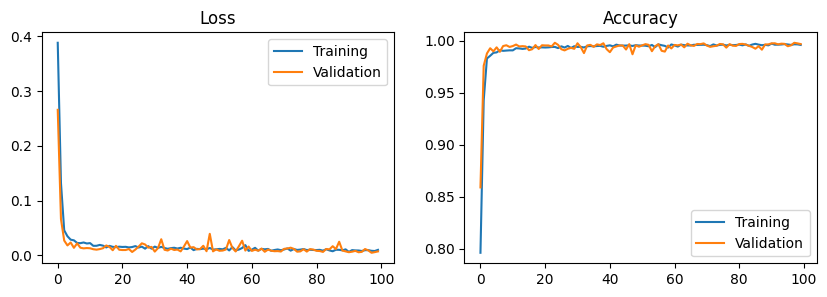

In [104]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()

In [112]:
pred = model.predict(x_test)
pred = [(1 if p>=0.5 else 0) for p in pred]
accuracy = np.sum(pred==y_test)/len(y_test)
accuracy = f'{accuracy*100:.2f}%'

with open('README.txt','w') as f:
    f.write('Model Accuracy: '+accuracy)

print(accuracy)

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
99.69%
